In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster

# Q1: Consider the following table as training set to predict customer’s default status.
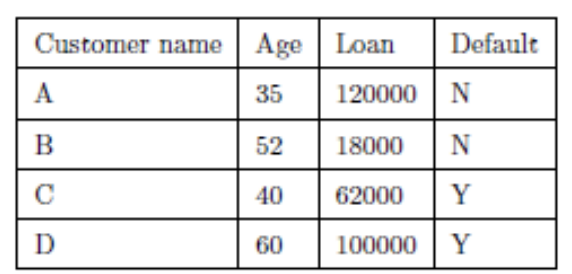


#### Creating the pandas dataframe of above given table (Define the training data) :

In [4]:
cust_data = {
    'Customer name': ['A', 'B', 'C', 'D'],
    'Age': [35, 52, 40, 60],
    'Loan': [120000, 18000, 62000, 100000],
    'Default': ['N', 'N', 'Y', 'Y']
}

df = pd.DataFrame(cust_data)
df

,Customer name,Age,Loan,Default
0,A,35,120000,N
1,B,52,18000,N
2,C,40,62000,Y
3,D,60,100000,Y


## Part (a): Perform KNN (K=3) algorithm over this dataset and predict the class of a new name = ‘E’ with age as 48 and income as 148000. Use Manhattan distance (Hint: Take the log scale of ‘Loan’ column to calculate the distance measure easily. (5 points)

In [5]:
new_data = {
    'Customer name': 'E',
    'Age': 48,
    'Loan': np.log(148000) 
}

### Convert 'Loan' column to log scale

In [6]:
cust_data['Loan'] = np.log(cust_data['Loan'])

### Calculate Manhattan distance

In [7]:
def manhattan_distance(p1, p2):
    return abs(p1['Age'] - p2['Age']) + abs(p1['Loan'] - p2['Loan'])

### Predict function using KNN

In [8]:
def predict(cust_data, new_data, k):
    distances = []
    for i in range(len(cust_data['Customer name'])):
        dist = manhattan_distance(new_data, {
            'Age': cust_data['Age'][i],
            'Loan': cust_data['Loan'][i]
        })
        distances.append((cust_data['Default'][i], dist))
    distances.sort(key=lambda x: x[1])
    neighbors = [d[0] for d in distances[:k]]
    # Predict class label based on majority vote
    prediction = max(set(neighbors), key=neighbors.count)
    return prediction

### Predicting class label for new data point

In [9]:
predicted_class = predict(cust_data, new_data, k=3)
print("Predicted class for customer 'E' using KNN :", predicted_class)

Predicted class for customer 'E' using KNN : Y


### 

## Part (b): Perform the Decision Tree Algorithm over it taking entropy as purity measure and create a decision tree. Predict the class of test sample described in part a. (5 points)

### Convert data to numpy arrays

In [10]:
X_train = np.array([cust_data['Age'], cust_data['Loan']]).T
y_train = np.array(cust_data['Default'])

### Train Decision Tree Classifier using entropy as purity measure

In [11]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### Print the decision tree

In [12]:
tree_rules = export_text(clf, feature_names=['Age', 'Loan'])
print(tree_rules)

|--- Age <= 37.50
|   |--- class: N
|--- Age >  37.50
|   |--- Loan <= 10.42
|   |   |--- class: N
|   |--- Loan >  10.42
|   |   |--- class: Y



### Visualize the decision tree

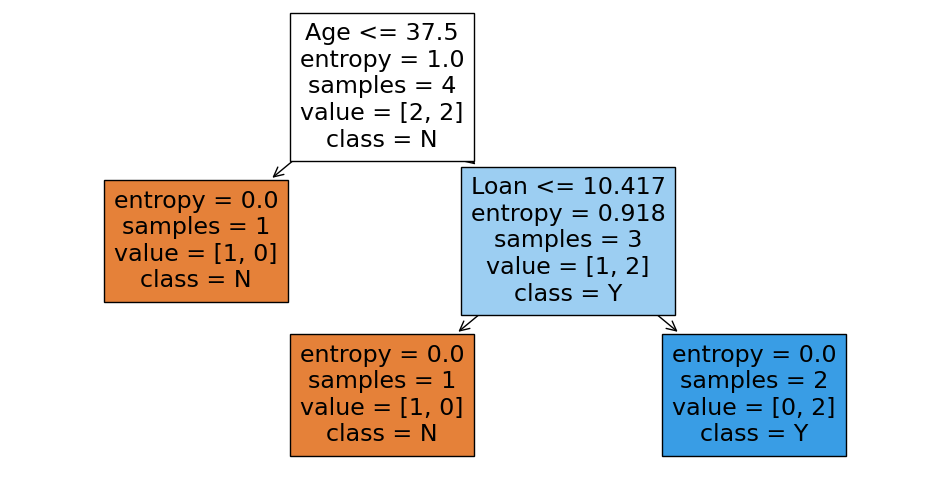

In [13]:
fig = plt.figure(figsize=(12, 6))
_ = tree.plot_tree(clf, feature_names=['Age', 'Loan'],  class_names=['N', 'Y'], filled=True)
plt.show()

### Predict the class of the test sample

In [14]:
new_data = {
    'Customer name': 'E',
    'Age': 48,
    'Loan': np.log(148000)
}
X_test = np.array([[new_data['Age'], new_data['Loan']]])
prediction_2 = clf.predict(X_test)

print("Predicted class for new sample using Decision Tree Classifier:", prediction_2[0])


Predicted class for new sample using Decision Tree Classifier: Y


### 

## Part (c): Consider a dataset with several irrelevant features along with few useful features. Would you expect kNN or Decision Trees to be more resistant to the irrelevant features? Justify your answer. (5 points)

- In the above provided set of data:

1. 'Customer name' may be found not necessary for particular studies, particularly if the study focuses primarily on demographic or financial variables.
2. 'Age' may be relevant because it is associated with the chance of loan default.
3. 'Loan' is absolutely useful because it reflects the amount borrowed by each consumer.
4. 'Default' is an important element that indicates whether the customer defaulted on their loan or not.

So, in the above given dataset, 'Customer name' might be considered irrelevant, while 'Age', 'Loan', and 'Default' are useful features.

#### Consider a dataset with several irrelevant features along with few useful features

In [15]:
example_dataset = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
example_dataset.sample(6)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
336,580,1,1.2,1,0,0,47,0.9,91,3,1,1086,1345,3451,15,1,11,1,1,0,3
1013,1694,0,1.8,0,0,0,53,1.0,186,6,0,1194,1208,1653,7,5,6,1,0,0,2
360,809,0,0.8,0,10,0,21,0.9,91,7,19,1453,1726,1274,18,7,3,0,0,0,1
1035,1696,0,1.7,0,1,0,13,0.9,97,3,2,179,772,523,5,0,4,0,1,1,0
539,525,1,0.5,1,5,0,51,0.5,137,8,11,262,1587,1891,18,3,12,0,1,0,1
412,1478,1,0.8,1,12,0,48,0.7,99,5,17,694,882,1141,5,2,6,0,0,1,1


In [16]:
example_dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Would you expect kNN or Decision Trees to be more resistant to the irrelevant features? 

- For example consider the above dataset with several irrelevant features along with few useful features 

    - Identifying irrelevant and useful features:
        - To determine irrelevant and useful features, see the each columns correlation with the target variable (in this case, "price_range" is the target variable) and importance in predicting, also considering each columns potential significance in influencing the target variable.
    - Expected resistance of kNN vs. Decision Trees to irrelevant features:
        1. For KNN : 
            - k-Nearest Neighbors (kNN) is more sensitive to irrelevant features because it classifies instances using distance measurements. Irrelevant characteristics might cause noise in distance calculations, perhaps resulting in inferior performance.
        2. For Decision Trees :
            - On the other hand, Decision Trees are more resistant to irrelevant features since they make decisions based on feature splits that maximize information gain or decrease impurity (for example, Gini impurity and entropy). Irrelevant traits are less likely to have a substantial impact on these divides, especially if they play a little role in the decision making process.

### Justification for my answer.

1. kNN: In kNN, extra features may affect the distance measure, resulting in inaccurate classifications. For example, in the example dataset features such as mobile_wt or m_dep can contribute noise into distance estimations, potentially leading to misclassifications. As a result, kNN is projected to be less resistant to irrelevant characteristics.

2. Decision Trees: Irrelevant qualities are unlikely to have a substantial impact on Decision Tree decision-making. Decision Trees can automatically learn to discard unimportant features during the tree construction process by picking more informative splits based on factors such as information gain. Decision Trees are supposed to be more resistant to irrelevant features than kNN.

In conclusion, based on the above dataset, kNN is projected to be less resistant to irrelevant characteristics than Decision Trees.

# 

# Q2: Consider a 2D plane with these datapoints and class labels.

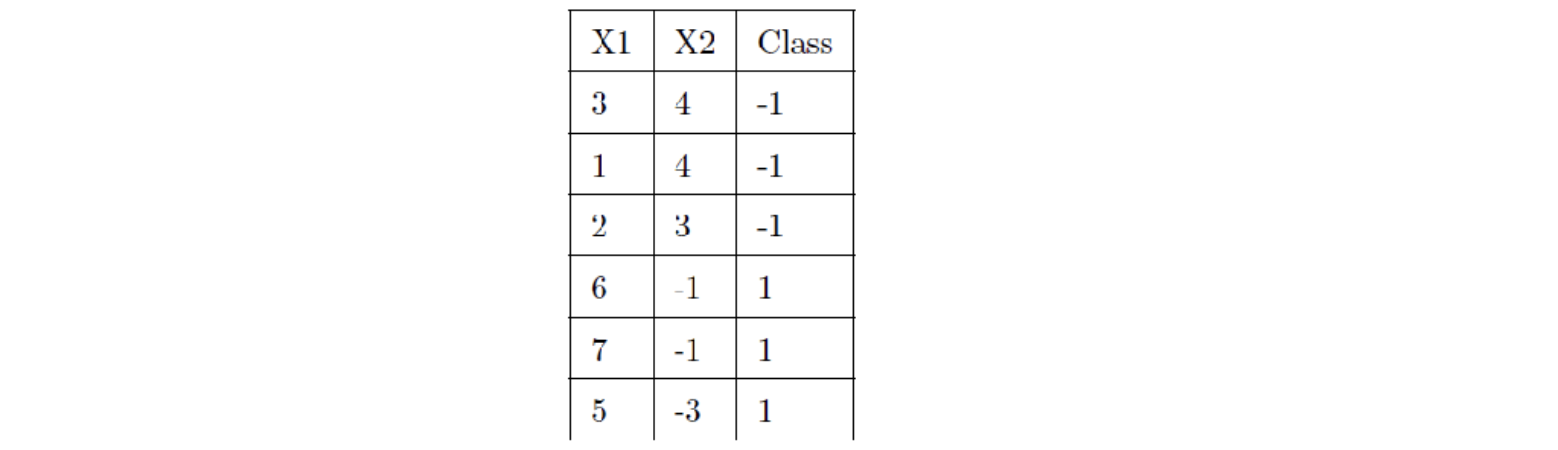

## Part (a): Create the linear decision boundary to separate the two classes using SVM logic. (10points)

In [17]:
from sklearn.svm import SVC
data = {
    'X1': [3, 1, 2, 6, 7, 5],
    'X2': [4, 4, 3, -1, -1, -3],
    'Class': [-1, -1, -1, 1, 1, 1]
}

X = np.array([data['X1'], data['X2']]).T
y = np.array(data['Class'])

print("Features (X):\n", X)
print("Labels (y):\n", y)


Features (X):
 [[ 3  4]
 [ 1  4]
 [ 2  3]
 [ 6 -1]
 [ 7 -1]
 [ 5 -3]]
Labels (y):
 [-1 -1 -1  1  1  1]


In [18]:
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)


SVC(kernel='linear')

### Scatter plot for Liner SVM Decision Boundary 

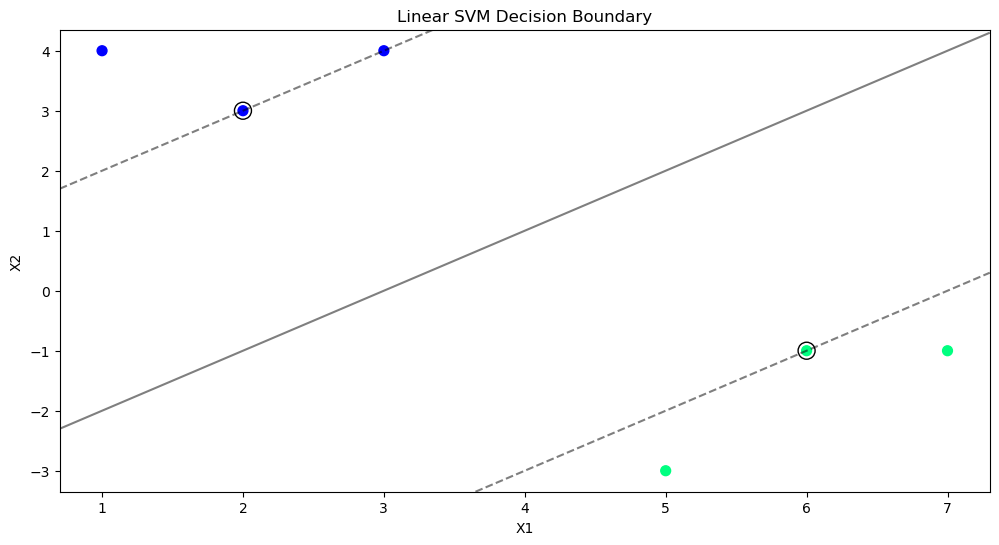

In [19]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', marker='o', s=50)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Creating the grid for model evaluation
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=150, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Linear SVM Decision Boundary')
plt.show()


### The above plot representing the decision boundary of a Linear Support Vector Machine (SVM) :

1. Data Points: The blue and green dots represent data from two distinct classes. The position of each dot is governed by the values of X1 and X2.
2. Decision Boundary: The SVM calculated the decision boundary, which is represented by the solid black line in the middle. This line indicates the hyperplane that the SVM has learned to best distinguish between the two classes.
3. Margins: The margins are shown by dashed lines running parallel to the decision boundary. The SVM algorithm attempts to optimize the distance between the decision boundary and the nearest data points of each class, as indicated by these margins.
4. Support Vectors: The circled dots are support vectors. These are the data points that are on the margins. They are the most significant data points for defining the decision border because moving any of them would cause the decision boundary to move as well.


### 

## Part (b): Identify the value of slope and intercept. (5 points)

In [20]:
slope = -svm_model.coef_[0][0] / svm_model.coef_[0][1]
intercept = -svm_model.intercept_[0] / svm_model.coef_[0][1]

print("Slope of the decision boundary:", slope)
print("Intercept of the decision boundary:", intercept)


Slope of the decision boundary: 1.0
Intercept of the decision boundary: -3.0


### 

## Part (c): Declare your support vectors. (5 points)

In [21]:
print("Support vectors:", '\n',  svm_model.support_vectors_)

Support vectors: 
 [[ 2.  3.]
 [ 6. -1.]]


#### Therefore there are 2 support vectors which can been seen in above plot, the 2 support vectors are mention above.


### 

# Q3: Consider the following data points on X-Y plane to implement the complete linkage hierarchical clustering using Manhattan distance.
# data points = (1,1), (2,1), (4,1), (2,6), (3,3), (4,4), (5,3)

## Part (a): Implement the complete linkage hierarchical clustering over above data points. (5 points)

### Defining the data points

In [22]:
data_points = np.array([[1, 1], [2, 1], [4, 1], [2, 6], [3, 3], [4, 4], [5, 3]])

### Def function to calculate Manhattan distance

In [23]:
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))

####  However, the linkage function from scipy.cluster.hierarchy requires a condensed distance matrix, which is what pdist returns.

    - To use your own distance function with linkage, we would need to manually create this condensed distance matrix.

### Compute the distances

In [24]:
distances_list = []
for i in range(len(data_points)):
    for j in range(i+1, len(data_points)):
        distances_list.append(manhattan_distance(data_points[i], data_points[j]))
print(distances_list)

[1, 3, 6, 4, 6, 6, 2, 5, 3, 5, 5, 7, 3, 3, 3, 4, 4, 6, 2, 2, 2]


### Perform complete linkage hierarchical clustering

In [25]:
clusters = linkage(distances_list, method='complete')
print(clusters)

for i, cluster in enumerate(clusters, 1):
    print(f"Cluster {i}: {cluster}")

[[ 0.  1.  1.  2.]
 [ 4.  5.  2.  2.]
 [ 6.  8.  2.  3.]
 [ 2.  7.  3.  3.]
 [ 9. 10.  6.  6.]
 [ 3. 11.  7.  7.]]
Cluster 1: [0. 1. 1. 2.]
Cluster 2: [4. 5. 2. 2.]
Cluster 3: [6. 8. 2. 3.]
Cluster 4: [2. 7. 3. 3.]
Cluster 5: [ 9. 10.  6.  6.]
Cluster 6: [ 3. 11.  7.  7.]


### 

## Part (b): Draw the dendrogram after obtaining the clusters from complete linkage based hierarchical clustering. (5 points)

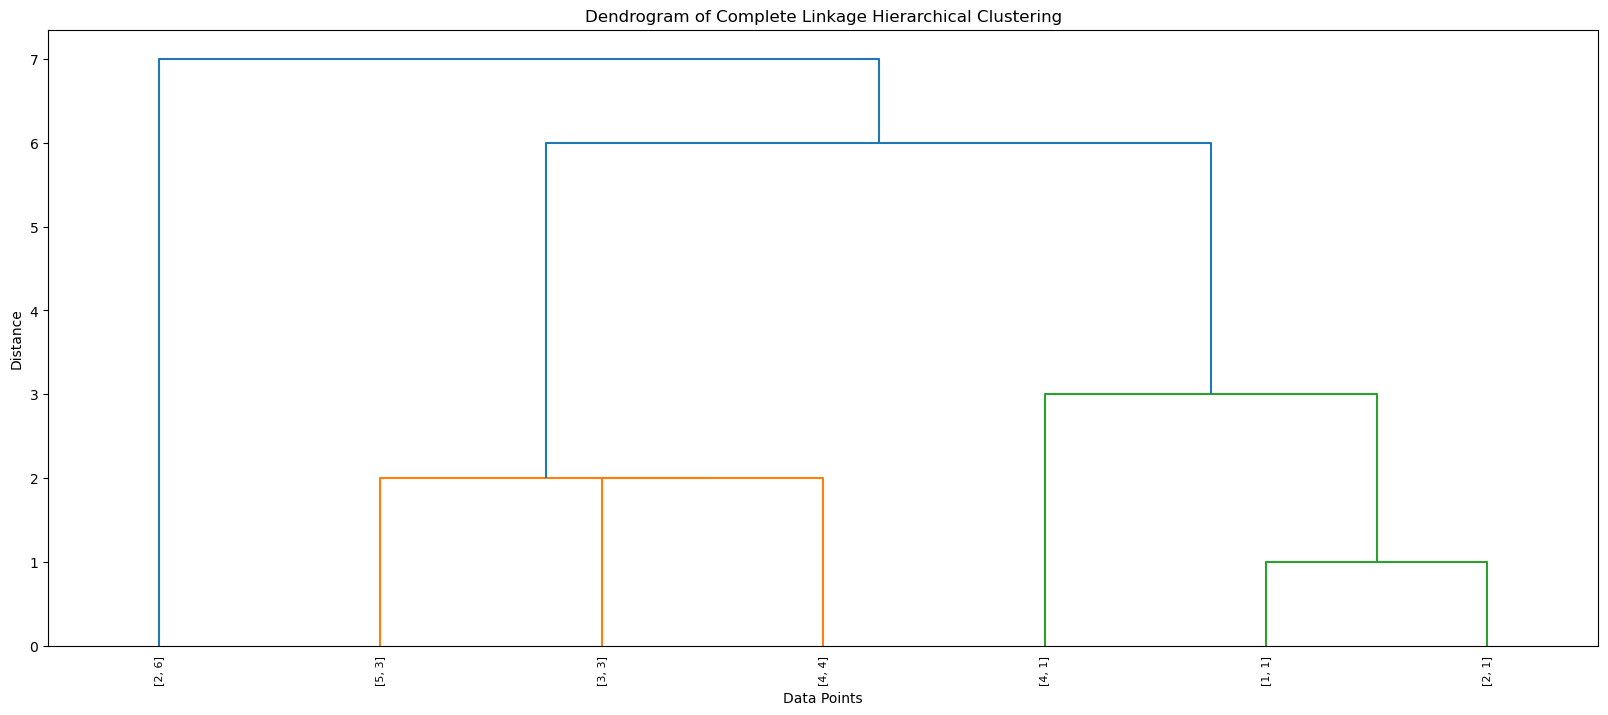

In [27]:
plt.figure(figsize=(20, 8))
dendrogram(clusters, labels=data_points.tolist(), leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram of Complete Linkage Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

#### In this problem, each data point is a pair of coordinates on the X-Y plane. 

- For example, (2, 6) represents a point at X=2 and Y=6. 
    - At first, the complete linkage hierarchical clustering method treats each of these points as its own cluster. Then it gradually merges the nearest pair of clusters until just one cluster (or a defined number of clusters) remains. The Manhattan distance determines the 'closeness' of two clusters in this situation. The dendrogram visually represents the process of merging. The height of the branches in the dendrogram represents the distance at which two clusters merged. The longer the branch, the farther apart the clusters are. The dendrogram is a visual depiction of the hierarchical clustering method.

#### NOTE - The output's indices idx1 and idx2 refer to the original dataset's first len(data_points) clusters. The indices correspond to newly generated clusters. A freshly generated cluster's index is len(data_points) + i, where i is the cluster number (which starts at zero).

### 

## Part (c): In general, can hierarchical clustering help in detecting outliers? Why/How? (3 points)

#### Yes, hierarchical clustering can help in detecting outliers. Outliers are often far away from the main clusters and can be identified as singleton clusters or clusters with very few points.

- Why :  
    - In hierarchical clustering, an outlier is a data point that forms its own cluster or joins a bigger cluster at a much greater distance than the other points. This is because hierarchical clustering methods iteratively merge the nearest pair of clusters, and an outlier will be far removed from all existing clusters.

- How :
    - When we look at the dendrogram (a tree-like diagram that depicts the arrangement of clusters produced by hierarchical clustering), an outlier is shown as a line (branch) that merges with the rest of the tree at a great distance. This is an obvious visual indicator of an anomaly.

- However, it should be noted that, while hierarchical clustering can aid in the identification of probable outliers, it does not provide a statistical measure of outlierness. As a result, using hierarchical clustering in conjunction with other outlier detection approaches can yield more reliable results.

- Moreover, the effectiveness of hierarchical clustering in outlier detection can vary depending on the type of data and the clustering algorithm used. Certain methods may be more sensitive to outliers than others. 

    - For example, a single bond might occasionally result in extensive chains, leading to less informative clusters and dendrograms. In contrast, complete linkage or average linkage procedures are typically more resistant to outliers.


### 

## Part (d): In general, can we prune the dendrogram? How? (2 points)

#### Yes, we can prune the dendrogram by setting a threshold distance. Any clusters that form below this threshold distance are considered separate clusters. This helps in deciding the number of clusters to choose from the dendrogram.
-  Pruning a dendrogram involves setting a distance cut-off level, below which the hierarchical tree will be cut, resulting in a forest of trees, also known as clusters.

1. The first step is to determine a distance threshold. This threshold represents the y-value in the dendrogram where the tree will be 'cut'. All vertical lines in the dendrogram that intersect a horizontal line at this y-value are severed, and the clusters they connect become distinct.

2. Cut the Dendrogram: After determining a distance threshold, you can cut the dendrogram at that level. In Python, utilize the fcluster function from the scipy.cluster.hierarchy package to accomplish this. You pass the linkage matrix (which you obtained from the linkage function) and the distance threshold to fcluster, which returns an array of cluster labels.

In [28]:
distance_threshold = 5
labels = fcluster(clusters, distance_threshold, criterion='distance')

print(labels)

[2 2 2 3 1 1 1]


In [31]:
print("Number of data points in clusters:", len(clusters))
print("Number of elements in labels:", len(labels))


Number of data points in clusters: 6
Number of elements in labels: 7


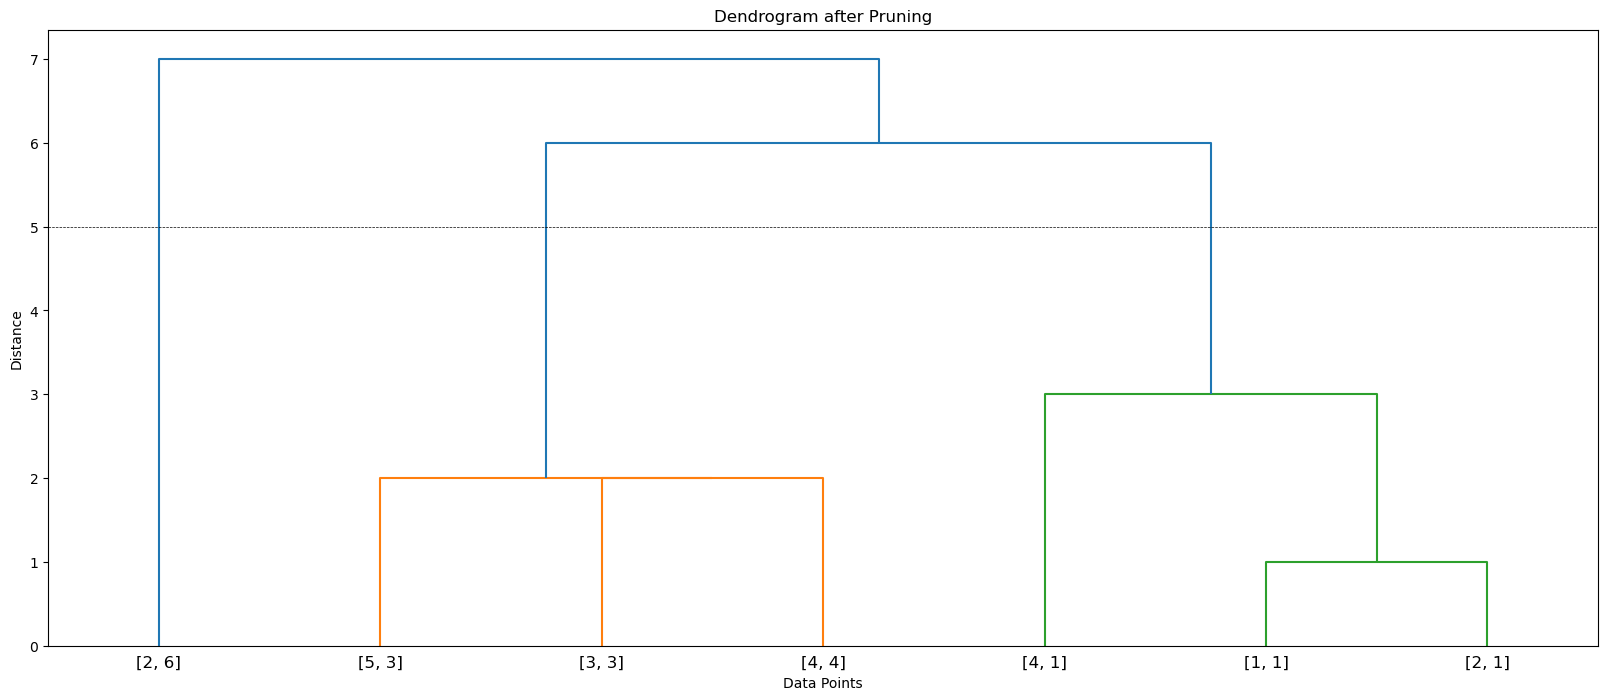

In [32]:
plt.figure(figsize=(20, 8))
dendrogram(clusters, labels=data_points.tolist())
plt.axhline(y=distance_threshold, c='k', ls='--', lw=0.5)
plt.title('Dendrogram after Pruning')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

- In this example, labels is an array with the i-th entry representing the cluster label for the i-th data point. All data points with the same label are in the same cluster.

- Please keep in mind that selecting the distance threshold is an important step that is relevant to your use case. A common strategy is to examine the dendrogram and select a distance that produces an acceptable number of clusters. However, there are more systematic ways, such as the Elbow Method and the Silhouette Method, that attempt to determine the best number of clusters based on specific criteria.

- The effectiveness of pruning, like any other machine learning technique, is determined by the nature of your data and the specific problem attempting to address. It's usually a good idea to try out several tactics and validate your results using some sort of ground truth or external criteria, if available.

# 

# Bonus Points: Answer the following questions and get bonus points. Bonus points will get adjusted in your previous assignments or midterm exam.

## Interview Q1: Explain the term Bias-Variance Trade Off with plot/examples. What is the link of overfitting & underfitting with Bias-Variance Trade Off? (5 points)

#### The Bias-Variance Trade Off is a fundamental concept in machine learning that describes the balance that must be struck between bias and variance, two types of errors that a model might make.

- Bias refers to errors caused by too simplistic assumptions in the learning algorithm. As a result, the model performs poorly because it is overly simplistic and fails to represent the data's complexity. This is referred to as underfitting.

- Variance, on the other hand, refers to errors caused by an overly complex learning system. This results in a model that is overly sensitive and performs badly on unseen data because it is overfitting to noise or random fluctuations in training data. This is referred to as overfitting.

#### Please refer the below example for more detail : 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#### Generate the non-linear data

In [34]:
np.random.seed(0)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

#### Split the data into training and test sets

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=74)

#### Def Function to plot the Bias-Variance Trade Off & Function to fit polynomial regression model and calculate errors

In [36]:

def plot_bias_variance_tradeoff(train_errors, test_errors, degrees):
    plt.figure(figsize=(20, 6))
    plt.plot(degrees, train_errors, label='Training Error', marker='o')
    plt.plot(degrees, test_errors, label='Test Error', marker='o')
    plt.title('Bias-Variance Trade Off')
    plt.xlabel('Model Complexity (Degree of Polynomial)')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    plt.show()
    
def polynomial_regression(degrees, X_train, X_test, y_train, y_test):
    train_errors = []
    test_errors = []

    for degree in degrees:
        # Create polynomial features
        polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
        # Linear regression model
        linear_regression = LinearRegression()
        # Pipeline for polynomial regression
        pipeline = Pipeline([
            ('poly_features', polynomial_features),
            ('lin_reg', linear_regression)
        ])
        # Fit the model
        pipeline.fit(X_train, y_train)
        
        # Calculate training error
        y_train_pred = pipeline.predict(X_train)
        train_error = mean_squared_error(y_train, y_train_pred)
        train_errors.append(train_error)

        # Calculate test error
        y_test_pred = pipeline.predict(X_test)
        test_error = mean_squared_error(y_test, y_test_pred)
        test_errors.append(test_error)

    return train_errors, test_errors


#### Fit polynomial regression models and calculate errors

In [37]:
degrees = np.arange(1, 10)
train_errors, test_errors = polynomial_regression(degrees, X_train, X_test, y_train, y_test)

#### Plot the Bias-Variance Trade Off

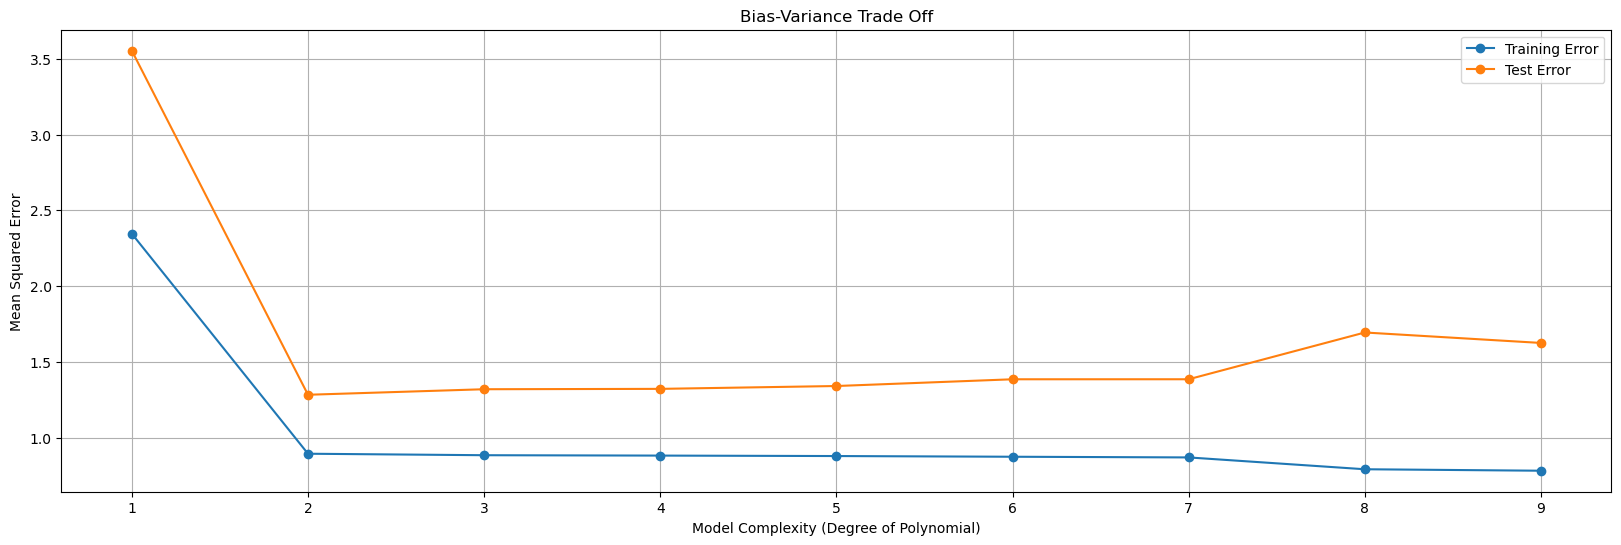

In [38]:
plot_bias_variance_tradeoff(train_errors, test_errors, degrees)

From above graph : 

- The x-axis reflects Model Complexity (Degree of Polynomial) and ranges from 1 to 9.
- The y-axis shows Mean Squared Error, which ranges from 0.75 to 2.75.
- Two lines are drawn, one for Training Error (blue) and one for Test Error (orange).

- The plot shows the following:

    - At lower model complexity (left), both training and test errors are large, indicating a high bias where the model is too basic and underfits the data.
    - As model complexity increases, training error continuously declines, while test error initially lowers but later climbs. When test error begins to increase, variance takes control, indicating overfitting as the model becomes too sophisticated.

- So, overfitting, underfitting, and the Bias-Variance Trade Off are all related to the model's complexity. A model that is too basic underfits the data and has a high bias, whereas a model that is too complicated overfits the data and has a large variance. The Bias-variation Trade Off is all about determining the optimal level of complexity that minimizes both bias and variation. This is commonly depicted as a U-shaped curve, as shown in your diagram. The bottom of the 'U' represents the ideal spot for minimizing the total of bias and variance errors.

### 

## Interview Q2: Explain the term Confusion-Matrix with a table/examples. What information can you deduct from a Confusion-Matrix? (5 points)

#### A confusion matrix is a table that is commonly used to assess the performance of classification models. It enables for the visualization of an algorithm's performance by displaying the number of true positives, true negatives, false positives, and false negatives. The matrix's rows represent occurrences in an actual class, while the columns indicate instances in a forecast class.

##### Below is the Example of the Confusion Matrix:

#### Example of Confusion matrix using python:

In [39]:
from sklearn.metrics import confusion_matrix

actual_labels = [0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
predicted_labels = [0, 1, 0, 1, 1, 0, 0, 1, 1, 0]

conf_matrix = confusion_matrix(actual_labels, predicted_labels)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4 1]
 [1 4]]


#### Interpretation:

1. True Positive (TP): The model accurately identified four examples as positive (1).
2. True Negative (TN): The model accurately identified two cases as negative (0).
3. False Positive (FP): The model misclassified two events as positive (1) when they were actually negative (0).
4. False Negative (FN): The model predicted two instances as negative (0) when in fact they were positive (1).

#### Details from Confusion Matrix:

    1. Accuracy = (TP + TN) / (TP + TN + FP + FN).
    2. Precision: TP/(TP + FP).
    3. Recall (Sensitivity): TP/(TP + FN).
    4. Specificity: TN/(TN + FP).
    5. F1 Score = 2 * (Precision * Recall) / (Precision + Recall).

- Overall, the confusion matrix sheds light on the effectiveness of a classification model by revealing how well it predicts each class and the types of errors it makes.

### 

## Interview Q3: Explain the term ROC curve with plot/examples. What information can you deduct from a ROC curve? (5 points)

#### ROC Curve (Receiver Operating Characteristic Curve):

- The ROC curve is a graphical representation of a binary classification model's performance at various thresholds. It displays the True Positive Rate (TPR) against the False Positive Rate (FPR) at various thresholds. TPR, also known as sensitivity or recall, is the percentage of true positive events that were correctly categorized as positive. The FPR represents the percentage of negative incidents that were wrongly labeled as positive.

In [40]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

#### Generate example data

In [41]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Train logistic regression model

In [42]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#### Predict probabilities, Compute ROC curve and ROC area, 

In [43]:
probs = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

#### Plot ROC curve

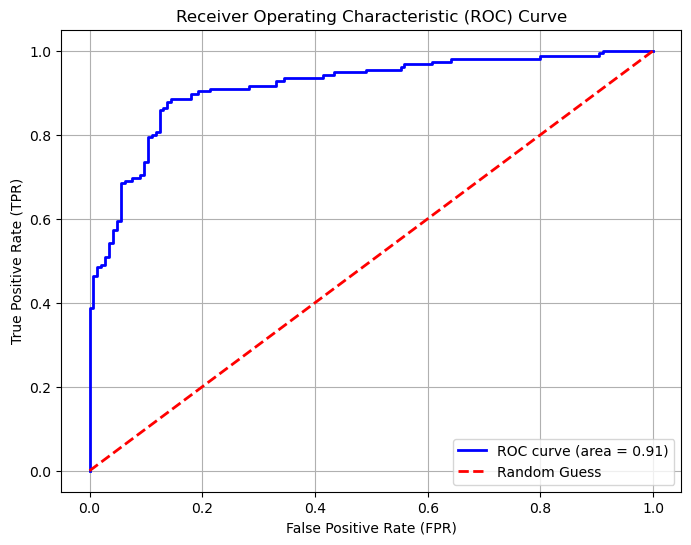

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Interpretation:

    - The ROC curve represents the trade-off between sensitivity (TPR) and specificity (1 - FPR) at various thresholds.
    - A diagonal line (dashed red line) depicts random guessing, with the true positive rate equal to the false positive rate.
    - The model's performance improves as the ROC curve approaches the upper left corner. An area under the ROC curve (AUC) value closer to one suggests that the model has superior discrimination abilities.

### Information from the ROC Curve:

    - Area Under the Curve (AUC): AUC measures the classifier's overall performance at all classification thresholds. Higher AUC values indicate improved model performance.
    - Threshold Selection: ROC curves assist in determining the best threshold for the classifier based on a balance of true positive and false positive rates.
    - Model Comparison: ROC curves enable the comparison of many models. The model with a higher AUC value is generally thought to perform better at distinguishing between positive and negative cases.
    - Sensitivity and Specificity: ROC curves provide information about the model's sensitivity and specificity at various thresholds, allowing you to better understand the trade-offs.

### 

## Interview Q4: Explain the term Regularization with examples. (5 points)

#### Regularization:
    - Regularization is a strategy for preventing overfitting in machine learning models that involves adding a penalty term to the cost function. This penalty discourages the model from learning extremely complicated patterns in the training data, which may not translate well to new data. 
    - Regularization is very beneficial when dealing with high-dimensional data or when the number of features is disproportionate to the number of samples.

###### There are several regularization approaches, including L1 regularization (Lasso), L2 regularization (Ridge), and Elastic Net regularization, which combines L1 and L2 penalties.

    1. Lasso Regularization: Adds a penalty term equal to the coefficients' absolute value to the cost function. It promotes sparsity in coefficient values, thus performing feature selection by setting some coefficients to zero.

    2. L2 Regularization (Ridge): Adds a penalty term equal to the squared magnitude of coefficients to the cost function. It tends to decrease the coefficients towards zero without actually setting them to zero, resulting in a more stable and numerically efficient solution.

    3. Elastic Net Regularization: Elastic Net regularization combines L1 and L2 penalties to provide a balance of sparsity (like Lasso) and stability (like Ridge).

#### Example :

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import accuracy_score

#### Load Breast Cancer dataset

In [46]:
data = load_breast_cancer()
X, y = data.data, data.target

#### Split data into training and test sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

#### L1 Regularization (Lasso)

In [48]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso.fit(X_train, y_train)
lasso_preds = lasso.predict(X_test)
lasso_acc = accuracy_score(y_test, lasso_preds.round())
print("Lasso Accuracy:", round(lasso_acc, 2)*100, '%')

Lasso Accuracy: 96.0 %


#### L2 Regularization (Ridge)

In [49]:
ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train)
ridge_preds = ridge.predict(X_test)
ridge_acc = accuracy_score(y_test, ridge_preds.round())
print("Ridge Accuracy:", round(ridge_acc, 2)*100, '%')

Ridge Accuracy: 96.0 %


- For this example, we load the Breast Cancer Wisconsin (Diagnostic) dataset and divide it into training and test sets. The training data is then fitted with given regularization strengths (alpha) using Lasso and Ridge regression models. Finally, the models' performance on the test set is evaluated using an accuracy score.

- Regularization can be used for both regression and classification problems, as seen in this example. It aids in the prevention of overfitting and enhances the model's generalizability. Adjusting the regularization intensity (alpha) helps you to manage the trade-off between model complexity and performance.

# 